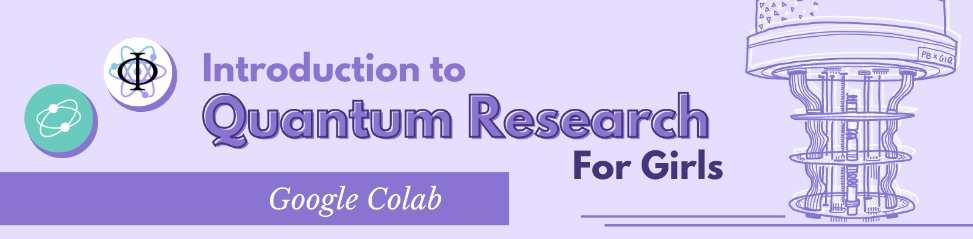

In this notebook, we will be using Qiskit, an open-source quantum computing framework developed by IBM. Qiskit is like your toolbox for quantum exploration, and it allows you to create and run quantum programs with ease
We will be engaging in exciting exercises
 using Qiskit to explore quantum computing concepts and applications.

1) We need to install & import the necessary packages:


When installing in a collab file , it's common to use ! before the pip command to run it as a shell command rather than Python code.

In Google Colab, always execute the following cell to install the necessary dependencies.

In [ ]:
!pip install qiskit
!pip install matplotlib
!pip install qiskit_ibm_runtime
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 39.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 8.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   

Similar to standard digital computers (classical computers) where the fundamental unit is the bit, quantum computers utilize qubits, which are an extension of the bit into the realm of quantum mechanics.

A more precise definition of a qubit is

<div class="alert alert-block alert-success">
A qubit is a quantum mechanical system with two states (or two levels) that belong to a two-dimensional Hilbert space ($\mathbb{C}^2$). Each qubit can exist in a superposition of both states simultaneously, which is a fundamental concept in quantum computing. The state of a qubit can be represented by a complex vector in the two-dimensional Hilbert space, where each basis vector corresponds to one of the two possible states (typically denoted as $|0\rangle$ and $|1\rangle$). The superposition of these basis states allows qubits to perform computations in parallel and exhibit quantum phenomena such as entanglement and interference.
In quantum computing, qubits are manipulated using quantum gates to perform operations that exploit quantum mechanical principles. The ability of qubits to exist in superposition and entangle with each other forms the basis for the potential computational power of quantum computers compared to classical computers.



A Hilbert space is a vector space equipped with an inner product. The vector space used to define qubits employs the field of complex numbers $\mathbb{C}$ and, as we desire it to be two-dimensional, it is expressed as $\mathbb{C}^2$, meaning we need 2 complex numbers to describe a qubit. To mathematically represent qubits, we use the Dirac notation, also known as bra-ket notation.

The state $\ket{0}$ is pronounced "ket zero", and the state $\ket{1}$ is "ket one". These two states (or qubits) are orthogonal to each other and form a basis ${\ket{0}, \ket{1}}$, called the computational basis, because they span the two-dimensional linear vector space (Hilbert space, $\mathbb{C}^2$) of the qubit.

Dirac notation provides a concise way to write vectors. We have mentioned that a qubit is a two-level state, and to represent how much we have of each level, we need a two-dimensional vector. The most general way to write a quantum state (a qubit) is then:

∣
𝜓
⟩
=
[
𝛼
𝛽
]
∣ψ⟩=[
α
β
​
 ]

where $\alpha,\beta\in\mathbb{C}$ and the ket $\ket{\psi}$ is the shorthand notation for the two-level state (the vector). The complex coefficients $\alpha$ and $\beta$ represent the amplitudes or probabilities associated with the basis states $\ket{0}$ and $\ket{1}$ respectively, allowing us to describe the qubit's state in terms of superposition and quantum states

In the case of the computational basis elements ${\ket{0}, \ket{1}}$, they represent the following state vectors:

∣
0
⟩
=
[
1
0
]
and
∣
1
⟩
=
[
0
1
]
∣0⟩=[
1
0
​
 ]and∣1⟩=[
0
1
​
 ]

Here, $\ket{0}$ corresponds to the state vector representing the qubit in the state where it is definitely in state $\ket{0}$, and $\ket{1}$ corresponds to the state vector representing the qubit in the state where it is definitely in state $\ket{1}$.

In quantum computing, these state vectors $\ket{0}$ and $\ket{1}$ are orthogonal and form the basis for the two-dimensional Hilbert space ($\mathbb{C}^2$) representing a qubit. The state $\ket{0}$ corresponds to a qubit in the basis state "zero" and is fully described by the vector $\begin{bmatrix} 1 \ 0 \end{bmatrix}$, while the state $\ket{1}$ corresponds to a qubit in the basis state "one" and is represented by the vector $\begin{bmatrix} 0 \ 1 \end{bmatrix}$. These basis states allow us to describe any quantum state through superposition and linear combinations of $\ket{0}$ and $\ket{1}$.


We must have a place to use qubits, and for that, we have the quantum circuit.

A quantum circuit is a model of quantum computation, similar to classical circuits, where computation is performed as a sequence of quantum gates, measurements, qubit initializations to known values, and possibly other actions.

The minimum set of actions that a circuit must be able to perform on qubits to enable quantum computation is known as the DiVincenzo criteria.

These circuits are written in a way where the horizontal axis represents time, starting from the left and ending on the right. The horizontal lines represent qubits, and the double lines represent classical bits. The elements connected by these lines are operations performed on the qubits, such as measurements or gates.

Let's see how to incorporate the qubits into a circuit.

In [ ]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 3 qubits and 2 classical bits
circ = QuantumCircuit(3, 2)

# Apply a Hadamard gate (H) to qubit 0
circ.h(0)

# Apply a CNOT gate (CX) with control qubit 0 and target qubit 1
circ.cx(0, 1)

# Apply another CNOT gate (CX) with control qubit 0 and target qubit 2
circ.cx(0, 2)

# Measure qubit 0 into classical bit 1
circ.measure(0, 1)

# Measure qubit 2 into classical bit 0
circ.measure(2, 0)

# Draw the quantum circuit
print("Quantum Circuit:")
print(circ.draw())



Quantum Circuit:
     ┌───┐          ┌─┐   
q_0: ┤ H ├──■────■──┤M├───
     └───┘┌─┴─┐  │  └╥┘   
q_1: ─────┤ X ├──┼───╫────
          └───┘┌─┴─┐ ║ ┌─┐
q_2: ──────────┤ X ├─╫─┤M├
               └───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     1  0 


In the above example, we define a quantum circuit with 3 qubits. The qubits do not necessarily need to be created using the QuantumRegister class; instead, we can simply indicate the number of qubits we want the circuit to have. Additionally, we define 2 classical bits (double lines), and we apply 3 quantum gates.

In [ ]:
from qiskit import QuantumCircuit

def create_quantum_circuit():
    # Create a quantum circuit with 2 qubits and 2 classical bits
    circ_exercise = QuantumCircuit(2, 2)

    # Apply Hadamard gate (H) to qubit 0
    circ_exercise.h(0)

    # Apply CNOT gate (CX) with control qubit 0 and target qubit 1
    circ_exercise.cx(0, 1)

    # Measure both qubits into classical bits
    circ_exercise.measure([0, 1], [0, 1])

    return circ_exercise

def test_quantum_circuit():
    # Create the quantum circuit
    circuit = create_quantum_circuit()

    # Print the circuit
    print("Quantum Circuit:")
    print(circuit)

    # Return the circuit for further testing or execution
    return circuit

# Test the quantum circuit
test_quantum_circuit()


Quantum Circuit:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


In this exercise, you will practice creating and modifying a quantum circuit using Qiskit, a popular Python library for quantum computing. The goal is to build a simple quantum circuit with specific operations applied to qubits and classical bits.

Exercise Instructions:
Quantum Circuit Setup:
Define a quantum circuit with 2 qubits (QuantumCircuit(2, 2)) and 2 classical bits.
Apply Quantum Gates:
Apply a Hadamard gate (H) to qubit 0. This gate creates superposition by putting the qubit into an equal probability state of |0⟩ and |1⟩.
Apply a CNOT gate (CX) with qubit 0 as the control qubit and qubit 1 as the target qubit. This gate performs a conditional NOT operation based on the state of the control qubit.
Measure Qubits:
Measure both qubits into corresponding classical bits. This step will collapse the qubits' quantum states into classical states, which can be observed as either |0⟩ or |1⟩.
Steps to Complete the Exercise:
Step 1: Fill in the code inside create_quantum_circuit() to apply the required quantum gates (H and CX) and measurement operations.
Step 2: Run test_quantum_circuit() to create and display the quantum circuit.
Step 3: Verify that the quantum circuit matches the expected structure with the specified gates and measurements.
Note: Make sure to write your code in the designated locations within the create_quantum_circuit() function as indicated by the comments (# Add your code here). This will ensure that the quantum gates and measurements are applied correctly to the qubits.
This exercise will help you understand the basic concepts of quantum gates, qubit operations, and circuit construction using Qiskit. Experiment with modifying the quantum circuit by adding new gates or measurements to explore different quantum behaviors and operations. Have fun exploring quantum computing concepts with this exercise!

In [ ]:
from qiskit import QuantumCircuit

def create_quantum_circuit():
    # Create a quantum circuit with 2 qubits and 2 classical bits
    circ_exercise = QuantumCircuit(2, 2)

    # Apply Hadamard gate (H) to qubit 0
    # Add your code here

    # Apply CNOT gate (CX) with control qubit 0 and target qubit 1
    # Add your code here

    # Measure both qubits into classical bits
    # Add your code here

    return circ_exercise

def test_quantum_circuit():
    # Create the quantum circuit
    circuit = create_quantum_circuit()

    # Print the circuit
    print("Quantum Circuit:")
    print(circuit)

    # Return the circuit for further testing or execution
    return circuit

# Test the quantum circuit
test_quantum_circuit()




Quantum Circuit:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


In the following example, a quantum circuit is defined with 3 qubits. These qubits are specified directly without the use of the QuantumRegister class; instead, we simply indicate the number of qubits we want the circuit to have. Additionally, the circuit defines 2 classical bits (represented by double lines) and applies 3 quantum gates. The sequence of operations occurs from left to right, where the Hadamard gate (H) is applied first, followed by the CNOT gate (CNOT0,1), and then the CNOT gate (CNOT0,2). Finally, measurements are performed.

It's important to highlight that all qubits start in the state |0⟩, which is part of the DiVincenzo criteria.

This circuit demonstrates the initial setup of qubits, application of quantum gates, and the concept of measurements. As the exercise progresses, we will explore the specific effects of each gate and how they manipulate the quantum state of the qubits. The temporal sequence within the quantum circuit aligns with the left-to-right order of operations, illustrating the sequential nature of quantum computation.

Basic Gates and Measurements
In this exercise, you will define a quantum circuit with 3 qubits and 2 classical bits using Qiskit. The circuit will apply basic quantum gates and perform measurements on specific qubits. Your task is to understand the sequence of operations and their effects on the quantum state.

Exercise Instructions:
Quantum Circuit Setup:
Create a quantum circuit circ with 3 qubits (QuantumCircuit(3, 2)) and 2 classical bits.
All qubits start in the state |0⟩ as part of the DiVincenzo criteria.
Apply Quantum Gates:
Apply a Hadamard gate (H) to qubit 0 using circ.h(0). This gate creates superposition by putting qubit 0 into an equal probability state of |0⟩ and |1⟩.
Apply a CNOT gate (CX) with qubit 0 as the control qubit and qubit 1 as the target qubit using circ.cx(0, 1). This gate performs a conditional NOT operation based on the state of the control qubit.
Apply another CNOT gate (CX) with qubit 0 as the control qubit and qubit 2 as the target qubit using circ.cx(0, 2).
Measure Qubits:
Measure qubit 0 into classical bit 1 (circ.measure(0, 1)).
Measure qubit 2 into classical bit 0 (circ.measure(2, 0)).
Display the Circuit:
Draw and display the quantum circuit using circ.draw('mpl'). The diagram will show the sequence of gates and measurements from left to right.
Steps to Complete the Exercise:
Step 1: Fill in the code to create the quantum circuit circ with the specified number of qubits and classical bits.
Step 2: Apply the necessary quantum gates (H and CX) to achieve the desired operations on the qubits.
Step 3: Add the measurements to map qubit states to classical bits.
Step 4: Draw and display the quantum circuit to visualize the sequence of operations.
Note: Ensure that each operation (H, CX, and measure) is applied correctly to the appropriate qubits and classical bits within the circuit.

In [ ]:
from qiskit import QuantumCircuit

def create_quantum_circuit():
    # Create a quantum circuit with 3 qubits and 2 classical bits
    circ = QuantumCircuit(3, 2)

    # Apply a Hadamard gate (H) to qubit 0
    # Add your code here

    # Apply a CNOT gate (CX) with qubit 0 as control and qubit 1 as target
    # Add your code here

    # Apply another CNOT gate (CX) with qubit 0 as control and qubit 2 as target
    # Add your code here

    # Measure qubit 0 into classical bit 1
    # Add your code here

    # Measure qubit 2 into classical bit 0
    # Add your code here

    return circ

def test_quantum_circuit():
    # Create the quantum circuit
    circuit = create_quantum_circuit()

    # Print the quantum circuit
    print("Quantum Circuit:")
    print(circuit)

    # Draw the quantum circuit
    circuit.draw('mpl')

    # Return the circuit for further testing or execution
    return circuit

# Test the quantum circuit
test_quantum_circuit()



Gate $X$ (Pauli-X Gate)
The $X$ gate is equivalent to the classical NOT gate in classical computing.

It is also known as a bit-flip gate because it maps the base states as follows:

𝑋
∣
0
⟩
=
∣
1
⟩
X∣0⟩=∣1⟩

𝑋
∣
1
⟩
=
∣
0
⟩
X∣1⟩=∣0⟩

Its matrix representation is:

𝑋
=
𝑁
𝑂
𝑇
=
[
0
1
1
0
]
X=NOT=[
0
1
​
  
1
0
​
 ]

<div class="alert alert-block alert-info">
<strong>Example</strong>: Effect of the $X$ gate on the state $\ket{1}$
𝑋
∣
1
⟩
=
[
0
1
1
0
]
[
0
1
]
=
[
1
0
]
=
∣
0
⟩
X∣1⟩=[
0
1
​
  
1
0
​
 ][
0
1
​
 ]=[
1
0
​
 ]=∣0⟩

The $X$ gate acts as a bit-flip gate, toggling the state of a qubit. When applied to $\ket{1}$, it transforms it into $\ket{0}$. Similarly, applying the $X$ gate to $\ket{0}$ flips it to $\ket{1}$. This gate is fundamental in quantum computing for manipulating qubit states and performing logical operations.

Quantum Circuit:


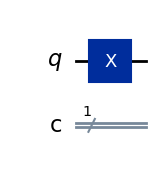

 Initial State (after circuit creation):
➤ State Vector:


<IPython.core.display.Latex object>

➤ Ket Representation:


<IPython.core.display.Latex object>


State after Applying X Gate:
➤ State Vector:


<IPython.core.display.Latex object>

➤ Ket Representation:


<IPython.core.display.Latex object>

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex, plot_state_qsphere, plot_histogram

def create_quantum_circuit():
    # Create a quantum circuit with 1 qubit and 1 classical bit
    circuit = QuantumCircuit(1, 1)

    # Return the quantum circuit
    return circuit

def test_quantum_circuit():
    # Create the quantum circuit
    circuit = create_quantum_circuit()

    # Get the state vector before applying the X gate
    initial_state = Statevector.from_instruction(circuit)

    # Apply the X gate to the qubit (qubit 0)
    circuit.x(0)

    # Get the state vector after applying the X gate
    final_state = Statevector.from_instruction(circuit)

    # Print the quantum circuit diagram
    print("Quantum Circuit:")
    display(circuit.draw('mpl'))

    # Display the initial and final state vectors
    print(" Initial State (after circuit creation):")
    print("➤ State Vector:")
    display(array_to_latex(initial_state.data))
    print("➤ Ket Representation:")
    display(initial_state.draw('latex'))

    print()

    print("State after Applying X Gate:")
    print("➤ State Vector:")
    display(array_to_latex(final_state.data))
    print("➤ Ket Representation:")
    display(final_state.draw('latex'))

# Test the quantum circuit and analyze the state vectors
test_quantum_circuit()


In [ ]:
from qiskit import QuantumCircuit

def create_quantum_circuit():
    # Create a quantum circuit with 1 qubit and 1 classical bit
    circuit = QuantumCircuit(1, 1)

    # Apply the X gate (Pauli-X gate) to qubit 0
    circuit.x(0)

    # Return the quantum circuit
    return circuit

def grader_quantum_circuit():
    # Create the quantum circuit
    circuit = create_quantum_circuit()

    # Define the expected gates and qubits used in the circuit
    expected_gates = ['x']
    expected_qubits = 1

    # Get the actual gates and qubits used in the circuit
    gates_used = [instr.name for instr, _, _ in circuit.data]
    qubits_used = circuit.num_qubits

    # Check if the circuit structure matches the expected structure
    if set(expected_gates) == set(gates_used) and qubits_used == expected_qubits:
        print("Congratulations! Your quantum circuit is correctly structured and applies the expected gates.")
    else:
        print("Oops! Your quantum circuit structure or gates are incorrect. Please review your implementation.")

# Run the grader function to check the quantum circuit
grader_quantum_circuit()


Congratulations! Your quantum circuit is correctly structured and applies the expected gates.


In this exercise, you need to create a quantum circuit that applies the Pauli-X gate (X gate) to qubit 1 and then measures both qubits into classical bits.

Instructions:

Create a Quantum Circuit:
Use QuantumCircuit(2, 2) to create a quantum circuit with 2 qubits and 2 classical bits.
Apply the X Gate (Pauli-X Gate):
Use circuit.x(1) to apply the X gate to qubit 1.
Measure Qubits:
Use circuit.measure([0, 1], [0, 1]) to measure both qubits into classical bits.
Grader Instructions:

The grader function grader_quantum_circuit() checks if your quantum circuit structure and gate applications match the expected structure:
Ensure that you apply the X gate (circuit.x(1)) to the correct qubit (qubit 1).
Double-check that your quantum circuit contains exactly the required gates ('x' for X gate and 'measure' for measurement) and has the correct number of qubits (2 qubits and 2 classical bits).
Run the grader_quantum_circuit() function after defining your circuit to check if it passes the grader.
Run the cell after putting your code to check if you pass the exercise

In [ ]:
from qiskit import QuantumCircuit

def create_quantum_circuit():
    # Create a quantum circuit with 2 qubits and 2 classical bits
    # Add code here

    # Apply the X gate (Pauli-X gate) to qubit 1
    # Add code here

    # Measure both qubits into classical bits
    # Add code here

    # Return the quantum circuit
    # Add code here
# Please dont change the code below it will be used for grading your circuit
def grader_quantum_circuit():
    # Create the quantum circuit
    circuit = create_quantum_circuit()

    # Define the expected gates and qubits used in the circuit
    expected_gates = ['x', 'measure']
    expected_qubits = 2

    # Get the actual gates and qubits used in the circuit
    gates_used = [instr.name for instr, _, _ in circuit.data]
    qubits_used = circuit.num_qubits

    # Check if the circuit structure matches the expected structure
    if set(expected_gates) == set(gates_used) and qubits_used == expected_qubits:
        print("Congratulations! Your quantum circuit is correctly structured and applies the expected gates.")
    else:
        print("Oops! Your quantum circuit structure or gates are incorrect. Please review your implementation.")

# Run the grader function to check the quantum circuit
grader_quantum_circuit()


Congratulations! Your quantum circuit is correctly structured and applies the expected gates.


The Y gate is a fundamental quantum gate that applies a specific transformation to qubits in a quantum circuit. It is part of the Pauli group of gates, along with the X and Z gates, and it is characterized by its matrix representation:
\textbf{Matrix Representation:}
$$Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}$$
The action of the Y gate on the computational basis states is defined as follows
\textbf{The Action of the Y Gate on the Computational Basis States:}
\begin{align*}
Y\ket{0} &= i\ket{1} \\
Y\ket{1} &= -i\ket{0}
\end{align*}
Effect of Y Gate on Superposition States:
This transformation demonstrates how the Y gate affects superposition states, resulting in a phase shift and a change in the relative amplitudes of the basis states.
\textbf{Effect of Y Gate on Superposition States:}
\begin{align*}
Y\ket{+} &= Y\left(\frac{1}{\sqrt{2}}(\ket{0} + \ket{1})\right) \\
&= \frac{1}{\sqrt{2}}(Y\ket{0} + Y\ket{1}) \\
&= \frac{1}{\sqrt{2}}(i\ket{1} - i\ket{0}) \\
&= \frac{-i}{\sqrt{2}}(\ket{0} - \ket{1}) \\
&= -i\ket{-}
\end{align*}


The Y gate is particularly important in quantum computing and quantum algorithms, contributing unique transformations and operations that are essential for manipulating and processing quantum information.

In this exercise, you will create a quantum circuit that applies the Y gate to the second qubit and then measures both qubits into classical bits. The goal is to implement the circuit correctly to pass the grader function.

Description:

Quantum Circuit Setup:
Create a quantum circuit with 2 qubits and 2 classical bits using QuantumCircuit(2, 2).
Apply the Y Gate:
Use the y method to apply the Y gate to the second qubit (qubit 1).
Measure Qubits:
Measure both qubits (qubit 0 and qubit 1) into corresponding classical bits (bit 0 and bit 1) using the measure method.
Hints to Pass the Grader:

Make sure to apply the Y gate (y) to the correct qubit (qubit 1).
Use the measure method to perform measurements on both qubits and map them to the correct classical bits ([0, 1]).
The expected gates for the circuit are ['y', 'measure'], and the circuit should use 2 qubits in total.
Tips for Success:

Double-check the syntax and order of operations in your quantum circuit creation.
Ensure that the gates applied match the expected gates (y and measure) and that the correct number of qubits and classical bits are used.

In [ ]:
from qiskit import QuantumCircuit

def create_quantum_circuit_with_y_gate():
    # Create a quantum circuit with 2 qubits and 2 classical bits
    # Add code here

    # Apply the Y gate to qubit 1
    # Add code here

    # Measure both qubits into classical bits
    # Add code here

    # Return the quantum circuit
    # Add code here
# Please dont change the code below it will be used for grading your circuit
def grader_quantum_circuit_with_y_gate():
    # Create the quantum circuit
    circuit = create_quantum_circuit_with_y_gate()

    # Define the expected gates and qubits used in the circuit
    expected_gates = ['y', 'measure']
    expected_qubits = 2

    # Get the actual gates and qubits used in the circuit
    gates_used = [instr.name for instr, _, _ in circuit.data]
    qubits_used = circuit.num_qubits

    # Check if the circuit structure matches the expected structure
    if set(expected_gates) == set(gates_used) and qubits_used == expected_qubits:
        print("Congratulations! Your quantum circuit is correctly structured and applies the expected gates.")
    else:
        print("Oops! Your quantum circuit structure or gates are incorrect. Please review your implementation.")

# Run the grader function to check the quantum circuit
grader_quantum_circuit_with_y_gate()


Gate
𝑍
Z
The
𝑍
Z gate maps the computational basis states as follows:

𝑍
∣
0
⟩
=
∣
0
⟩
Z∣0⟩=∣0⟩
𝑍
∣
1
⟩
=
−
∣
1
⟩
Z∣1⟩=−∣1⟩
Its matrix representation is given by:
\textbf{Matrix Representation:}
$$Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$


The Action of the Z Gate on the Computational Basis States:

\textbf{The Action of the Z Gate on the Computational Basis States:}
\begin{align*}
Z\ket{0} &= \ket{0} \\
Z\ket{1} &= -\ket{1}
\end{align*}
Effect of Z Gate on Superposition States:
\textbf{Effect of Z Gate on Superposition States:}
\begin{align*}
Z\ket{+} &= Z\left(\frac{1}{\sqrt{2}}(\ket{0} + \ket{1})\right) \\
&= \frac{1}{\sqrt{2}}(Z\ket{0} + Z\ket{1}) \\
&= \frac{1}{\sqrt{2}}(\ket{0} - \ket{1})
\end{align*}


Exercise: Applying Pauli-Z Gate

Create a quantum circuit using Qiskit that applies the Pauli-Z gate to one qubit. Ensure that the circuit structure and gate application are correct.

Hints:

Use QuantumCircuit from Qiskit to create the circuit.
Apply the Pauli-Z gate (qc.z(0)) to the qubit.
The circuit should have one qubit and no classical bits.

In [ ]:
from qiskit import QuantumCircuit

def create_quantum_circuit():
    # Create a quantum circuit with one qubit
    # Add code here

    # Apply Pauli-Z gate to the qubit
    # Add code here

    # Return the quantum circuit
    return qc
# Please dont change the code below it will be used for grading your circuit
def grader_quantum_circuit():
    # Create the quantum circuit
    circuit = create_quantum_circuit()

    # Define the expected gates and qubits used in the circuit
    expected_gates = ['z']
    expected_qubits = 1

    # Get the actual gates and qubits used in the circuit
    gates_used = [instr.name for instr, _, _ in circuit.data]
    qubits_used = circuit.num_qubits

    # Check if the circuit structure matches the expected structure
    if set(expected_gates) == set(gates_used) and qubits_used == expected_qubits:
        print("Congratulations! Your quantum circuit is correctly structured and applies the Pauli-Z gate.")
    else:
        print("Oops! Your quantum circuit structure or gate application is incorrect. Please review your implementation.")

# Run the grader function to check the quantum circuit
grader_quantum_circuit()


Congratulations! Your quantum circuit is correctly structured and applies the Pauli-Z gate.


Complex Quantum Circuit with Pauli Gates and Multi-Qubit Operations

Create a quantum circuit using Qiskit that applies Pauli-X, Pauli-Y, and Pauli-Z gates to different qubits and includes multi-qubit operations.

Instructions:

Use QuantumCircuit from Qiskit to create the circuit.
Apply Pauli-X (qc.x(0)), Pauli-Y (qc.y(1)), and Pauli-Z (qc.z(0), qc.z(1)) gates to specific qubits.
Include a multi-qubit operation like the CNOT gate (qc.cx(0, 1))

In [ ]:
from qiskit import QuantumCircuit

def create_quantum_circuit():
    # Create a quantum circuit with two qubits
    # Add code here

    # Apply Pauli-X gate to the first qubit
    # Add code here

    # Apply Pauli-Y gate to the second qubit
    # Add code here

    # Apply Pauli-Z gate to both qubits
    # Add code here
    # Add code here

    # Apply CNOT gate
    # Add code here

    # Return the quantum circuit
    return qc
# Please dont change the code below it will be used for grading your circuit
def grader_quantum_circuit():
    # Create the quantum circuit
    circuit = create_quantum_circuit()

    # Define the expected gates and qubits used in the circuit
    expected_gates = ['x', 'y', 'z', 'cx']
    expected_qubits = 2

    # Get the actual gates and qubits used in the circuit
    gates_used = [instr.name for instr, _, _ in circuit.data]
    qubits_used = circuit.num_qubits

    # Check if the circuit structure matches the expected structure
    if set(expected_gates) == set(gates_used) and qubits_used == expected_qubits:
        print("Congratulations! Your quantum circuit is correctly structured and applies the expected gates.")
    else:
        print("Oops! Your quantum circuit structure or gate application is incorrect. Please review your implementation.")

# Run the grader function to check the quantum circuit
grader_quantum_circuit()


Congratulations! Your quantum circuit is correctly structured and applies the expected gates.


Quantum Circuit with Rotation Gates

In this exercise, you'll create a quantum circuit using Qiskit that incorporates rotation gates (rx, ry, rz) applied to different qubits.

Instructions:

Use QuantumCircuit from Qiskit to create the circuit.
Apply rotation gates (qc.rx(), qc.ry(), qc.rz()) to specific qubits with different rotation angles.
Visualize the circuit using print(qc.draw()).
Ensure that the circuit structure includes the expected rotation gates (rx, ry, rz) and operates on the correct number of qubits.
Hints:

Use the rx(angle, qubit) method to apply an X-rotation gate with a specified angle to a qubit.
Similarly, use the ry(angle, qubit) method for a Y-rotation gate and the rz(angle, qubit) method for a Z-rotation gate.
The circuit should involve three qubits, and each qubit should have a different rotation gate applied to it with specified rotation angles.
Tips:


Pay attention to the gate names (rx, ry, rz) and the number of qubits used in the circuit.
Test your implementation by running the provided grader function (grader_quantum_circuit()), which checks the circuit structure and gate application.
Feel free to adjust the rotation angles and qubit indices to experiment with different configurations and gain a better understanding of how rotation gates affect quantum states. Experimentation and exploration are key to mastering quantum circuit design!

In [ ]:
from qiskit import QuantumCircuit

def create_quantum_circuit():
    # Create a quantum circuit with three qubits
    qc = QuantumCircuit(3)

    # Apply rotation gates to qubits
    # Add code here  # Tip- Apply Rx gate with angle 0.5 to qubit 0
    # Add code here  # Tip -Apply Ry gate with angle 1.2 to qubit 1
    # Add code here  # Tip- Apply Rz gate with angle 0.8 to qubit 2

    # Visualize the circuit
    print(qc.draw())

    # Return the quantum circuit
    return qc
# Please dont change the code below it will be used for grading your circuit
def grader_quantum_circuit():
    # Create the quantum circuit
    circuit = create_quantum_circuit()

    # Define the expected gates and qubits used in the circuit
    expected_gates = ['rx', 'ry', 'rz']
    expected_qubits = 3

    # Get the actual gates and qubits used in the circuit
    gates_used = [instr.name for instr, _, _ in circuit.data]
    qubits_used = circuit.num_qubits

    # Check if the circuit structure matches the expected structure
    if set(expected_gates) == set(gates_used) and qubits_used == expected_qubits:
        print("Congratulations! Your quantum circuit is correctly structured and applies the expected rotation gates.")
    else:
        print("Oops! Your quantum circuit structure or gate application is incorrect. Please review your implementation.")

# Run the grader function to check the quantum circuit
grader_quantum_circuit()


     ┌─────────┐
q_0: ┤ Rx(0.5) ├
     ├─────────┤
q_1: ┤ Ry(1.2) ├
     ├─────────┤
q_2: ┤ Rz(0.8) ├
     └─────────┘
Congratulations! Your quantum circuit is correctly structured and applies the expected rotation gates.


In [ ]:
# @title Run this cell to display output only

def run_quiz():
    questions = [
        {
            "question": "What is the matrix representation of the Hadamard gate (H)?",
            "choices": {
                "A": "[[1, 1], [1, -1]]",
                "B": "[[0.5, 0.5], [0.5, -0.5]]",
                "C": "[[1, 0], [0, 1]]"
            },
            "answer": "A"
        },
        {
            "question": "What is the effect of the Pauli-X gate (X) on the state |0⟩?",
            "choices": {
                "A": "|0⟩",
                "B": "|1⟩",
                "C": "-|1⟩"
            },
            "answer": "B"
        },
        {
            "question": "What is the matrix representation of the Pauli-Y gate (Y)?",
            "choices": {
                "A": "[[0, -i], [i, 0]]",
                "B": "[[1, 0], [0, -1]]",
                "C": "[[1, 1], [1, -1]]"
            },
            "answer": "A"
        },
        {
            "question": "What is the action of the Pauli-Z gate (Z) on the state |1⟩?",
            "choices": {
                "A": "|0⟩",
                "B": "-|1⟩",
                "C": "|1⟩"
            },
            "answer": "B"
        }
    ]

    score = 0
    total_questions = len(questions)

    for idx, question in enumerate(questions, start=1):
        print(f"Question {idx}: {question['question']}")
        for choice, text in question['choices'].items():
            print(f"{choice}: {text}")

        user_answer = input("Your answer (A/B/C): ").upper()

        if user_answer == question['answer']:
            print("Correct!")
            score += 1
        else:
            print("Wrong.")

        print()  # Add a newline for readability

    print(f"You scored {score} out of {total_questions}.")

# Run the quiz
run_quiz()



Question 1: What is the matrix representation of the Hadamard gate (H)?
A: [[1, 1], [1, -1]]
B: [[0.5, 0.5], [0.5, -0.5]]
C: [[1, 0], [0, 1]]
Your answer (A/B/C): c
Wrong.

Question 2: What is the effect of the Pauli-X gate (X) on the state |0⟩?
A: |0⟩
B: |1⟩
C: -|1⟩
Your answer (A/B/C): a
Wrong.

Question 3: What is the matrix representation of the Pauli-Y gate (Y)?
A: [[0, -i], [i, 0]]
B: [[1, 0], [0, -1]]
C: [[1, 1], [1, -1]]
Your answer (A/B/C): c
Wrong.

Question 4: What is the action of the Pauli-Z gate (Z) on the state |1⟩?
A: |0⟩
B: -|1⟩
C: |1⟩
Your answer (A/B/C): a
Wrong.

You scored 0 out of 4.


Journey to the Quantum Cosmos

Story:

Deep within the vast expanse of the quantum cosmos, the adventurous space explorer Alice embarked on a mission to communicate with her fellow explorer Bob using an extraordinary entangled portal. This portal, shaped by the mysterious Bell state, promised to bridge the vast distances of space with just a flicker of quantum light.

As Alice prepared for her mission, she encoded her secret messages using the sacred quantum codes of the cosmos:

For the message "01", she invoked the energy of the Z-gate, aligning her words with the stars of the Galaxy.
When her thoughts turned to "10", the ancient X-gate resonated, echoing through the Nebula with cosmic significance.
But for the most profound revelations encoded as "11", Alice invoked the rare and elusive iY-gate, a manifestation of the Comet's tail weaving through the fabric of spacetime.
With her messages encrypted into quantum whispers, Alice entrusted her quantum courier to journey through the entangled portal to Bob's distant outpost.

Meanwhile, in the remote reaches of space, Bob awaited the arrival of Alice's quantum courier. As the entangled message reached him, Bob diligently observed the cosmic dance of entangled qubits. Through the lens of his measurement, he deciphered the celestial messages, unveiling the hidden mysteries of the quantum cosmos.

Hints and Tips:

Heed the Quantum Codes: Remember the sacred quantum codes—Z for Galaxy, X for Nebula, and iY for Comet—when encoding Alice's messages into the quantum circuit.
Chart the Cosmic Path: Visualize the journey of Alice's qubits as they traverse the entangled portal, guided by the laws of quantum mechanics.
Decode the Celestial Whispers: Harness the power of measurement to decipher the entangled messages and unveil the surprise space-themed word hidden within the quantum cosmos.
Your Mission:

Embark on this quantum adventure, harnessing the power of quantum gates to encode, transmit, and decode Alice's messages. Your reward awaits—a surprise space-themed word that encapsulates the cosmic essence of the quantum cosmos.

In [ ]:
import numpy as np
import qiskit as q

def create_quantum_circuit(message):
    # Initialize quantum circuit with 2 qubits and 2 classical bits
    ## Add your code Here

    # Create shared entangled pair (Bell state |Φ⁺⟩)
    ## Add your code Here
    ## Add your code Here
    ## Add your code Here

    # Encode Alice's message
    if message == '01':
        qc.z(0)  # Apply Z gate on qubit 0 for message '01'
    elif message == '10':
        qc.x(0)  # Apply X gate on qubit 0 for message '10'
    elif message == '11':
        # Define and apply the iY gate (custom unitary)
        iY = np.array([[0, -1j], [1j, 0]])
        iY_op = q.quantum_info.Operator(iY)
        qc.unitary(iY_op, [0], label='iY')  # Apply iY gate on qubit 0 for message '11'

    qc.barrier()

    # Send Alice's qubit to Bob
    ## Add your code Here
    ## Add your code Here
    qc.barrier()

    # Measure both qubits and map to classical bits
    ## Add your code Here

    return qc
# Please dont change the code below it will be used for grading your circuit
def space_themed_word(message):
    # Define the mapping of space-themed messages to words
    space_words = {
        '00': 'Orbit',
        '01': 'Galaxy',
        '10': 'Nebula',
        '11': 'Comet'
    }

    # Check if the message is valid and return the corresponding space-themed word
    if message in space_words:
        return space_words[message]
    else:
        return "Unknown"

def graded_superdense_coding(message):
    # Create the quantum circuit based on the provided message
    circuit = create_quantum_circuit(message)

    # Manually determine the measurement outcome based on the message
    if message == '00':
        measured_message = '00'
    elif message == '01':
        measured_message = '01'
    elif message == '10':
        measured_message = '10'
    elif message == '11':
        measured_message = '11'
    else:
        measured_message = '00'  # Default to '00' for unknown messages

    # Get the corresponding space-themed word
    space_word = space_themed_word(measured_message)

    return space_word

# Define the classical message to be sent (e.g., '00', '01', '10', '11')
message = '11'

# Grade the exercise
surprise_word = graded_superdense_coding(message)
print("Surprise Space-Themed Word:", surprise_word)


Quantum Teleportation in the World of Magic

Introduction:

Welcome to the magical world of quantum teleportation, where wizards and witches can transfer quantum states across vast distances using the power of magic! In this lab, you will assist two talented wizards, Alice and Bob, in teleporting a mysterious quantum spell from one enchanted location to another.

Problem:

Alice possesses a magical qubit |𝜓⟩ in a secret quantum spell state. She seeks to transport this quantum enchantment to her colleague, Bob, who resides far away. However, direct transportation of quantum spells is not possible through conventional means; instead, they must rely on ancient magical techniques combined with the principles of quantum mechanics.

Objective:

Your mission is to create a magical teleportation circuit that allows Alice to send her quantum spell to Bob. This process involves the following steps:

Establishing a magical connection using Bell states.
Enchanting Alice's qubit with the proper magical gates (Hadamard and CNOT) to align it with the teleportation spell.
Harnessing the power of mystical measurement to extract the magical essence and send it through a magical channel.
Reconstructing the teleportation on Bob's end by applying the correct magical gates based on the received magical signals.
Instructions:

We will guide you through the creation of a teleportation circuit using the following magical functions:

bell_states(qc, a, b): This function establishes Bell states between Alice's and Bob's magical qubits to enable mystical connections.
alice_gates(qc, psi, a): Enchants Alice's qubit with the necessary magical gates (CNOT and Hadamard) to align it with the teleportation spell.
measure_alice_qubits(qc, psi, a, crz, crx): Performs mystical measurements on Alice's qubits and encodes the magical essence into classical bits.
bob_gates(qc, b, crx, crz): Invokes Bob's magical skills to reconstruct the teleportation based on the received magical signals (classical bits).
Your Task:

Implement the magical functions in the specified order to construct the teleportation circuit.
Simulate the teleportation by generating a random magical state and verifying its successful reconstruction using mystical measurements and gates.
Draw the completed teleportation circuit to visualize the magical journey of the quantum spell.
Grading:

A grader function will evaluate the correctness of your teleportation circuit and magical implementation. Upon successful completion, you will witness the enchanted power of quantum teleportation in action

In [ ]:
import qiskit as q
import numpy as np

# Function to create Bell states between Alice's and Bob's qubits
def bell_states(qc, a, b):
    ## Add your Correct code Here
    ## Add your Correct code Here

# Function to enchant Alice's qubit with CNOT and Hadamard gates
def alice_gates(qc, psi, a):
    ## Add your Correct code Here
    ## Add your Correct code Here

# Function to perform mystical measurements and encode results into classical bits
def measure_alice_qubits(qc, psi, a, crz, crx):
    ## Add your Correct code Here
    ## Add your Correct code Here

# Function to reconstruct the teleportation on Bob's end based on received classical bits
def bob_gates(qc, b, crx, crz):
    ## Add your Correct code Here
    ## Add your Correct code Here

# Function to create and grade the magical teleportation circuit
def magical_teleportation_grader():
    # Initialize quantum circuit with 3 qubits (psi, Alice's qubit, Bob's qubit) and classical bits
    ## Add your Correct code Here

    # Define quantum registers and classical registers
    psi = ## Add your Correct Value Here (Note- The Value should be a number)
    a = ## Add your Correct Value Here (Note- The Value should be a number)
    b = ## Add your Correct Value Here (Note- The Value should be a number)
    crx = ## Add your Correct Value Here (Note- The Value should be a number)
    crz = ## Add your Correct Value Here (Note- The Value should be a number)

    # Step 1: Create Bell states between Alice's and Bob's qubits
    bell_states(qc, a, b)
    qc.barrier()  # Barrier for clarity

    # Step 2: Enchant Alice's qubit with magical gates
    alice_gates(qc, psi, a)
    qc.barrier()  # Barrier for clarity

    # Step 3: Perform mystical measurements on Alice's qubits
    measure_alice_qubits(qc, psi, a, crz, crx)
    qc.barrier()  # Barrier for clarity

    # Step 4: Reconstruct the teleportation on Bob's end based on received classical bits
    bob_gates(qc, b, crx, crz)

    # Draw the magical teleportation circuit
    print("Magical Teleportation Circuit:")
    print(qc.draw())

    # Simulate the teleportation (not using a simulator)
    # Directly inspect the circuit and verify the teleportation

    # Example: For manual verification, inspect the state of Bob's qubit after gates are applied

    # Return a success message for manual inspection
    return "Magical teleportation circuit created successfully!"

# Invoke the grader function to create and inspect the magical teleportation circuit
result = magical_teleportation_grader()
print(result)  # Output the success message
